In [36]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd


## Preprocessing for PCA

#### Here, using the frontal face haar cascade, we crop all the images and store them in a new folder named 'PCA'. This image data is used for further analysis.

In [3]:
face_cascade = cv2.CascadeClassifier('frontalface_alt2.xml')

labels = []
label_names = []
data = []
y_label = []

# The main directory which consists of all 
# the collected images
dir = '/home/vaishnavi/Intro_DB'

i = 0
for root, dirs, files in os.walk(dir):
    for name in dirs:
        # Creating numerical labels representing 
        # each name in the dataset
        labels.append(i)
        i += 1
        
        # Creaying a new folder called 'PCA'
        # Creating sub-folders for each person
        path = '/home/vaishnavi/PCA/' + name
                    
        if not os.path.exists(path):
            os.makedirs(path)
        
        og_path = os.path.join(dir, name)
        for root, dirs, files in os.walk(og_path):
            n = 0
            for filename in files:
                # Parsing through each image 
                # in the main dataset 
                # Then, converting each image to
                # grayscale and applying the face
                # cascade on each image
                image = os.path.join(og_path, filename)
                img = cv2.imread(image)
                #cv2.imshow('image', img)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                #cv2.imshow('frame', gray)
                faces = face_cascade.detectMultiScale(gray, 1.2, 5)
                for (x, y, w, h) in faces:
                    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
                    roi_gray = gray[y:y+h, x:x+w]
                    roi_color = img[y:y + h, x:x + w]
                    
                    size = (64,64)
                    final_img = cv2.resize(roi_gray, size)
                
                os.chdir(path)
                imagename = name + str(n) + '.jpg'
                cv2.imwrite(imagename, final_img)
                y_label.append(i)              
                
                n+=1
                                
                

In [4]:
# Manually adding the list of labels
# to avoid creating folders everytime

#y_label = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [8]:
# Creating a list 'data' with list 
# of all the images from the Intro_DB 
# dataset
# Creating 'labels' list 

import os
import tensorflow as tf
import numpy as np

labels = []
data = []
filepaths = []
d_names = {}

dir = '/home/vaishnavi/PCA'
i = 0
for root, dirs, files in os.walk(dir):
    for name in dirs:
        labels.append(i)
        i += 1
        
    
    for filename in files:
        filepath = root + os.sep + filename
        filepaths.append(filepath)

        if filepath.endswith(".jpg") or filepath.endswith(".png"):
            image = tf.keras.preprocessing.image.load_img(filepath, color_mode='grayscale')
            image = np.array(image)
            data.append(image)
            
            if name in d_names:
                d_names[i].append(image)
            else:
                d_names[i] = [image]
            
            
data_mat = np.array(data)
# data = np.array(data)
# labels = np.array(labels)


In [9]:
faceshape = data[0].shape
faceshape

(64, 64)

<Figure size 432x288 with 0 Axes>

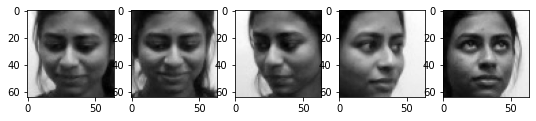

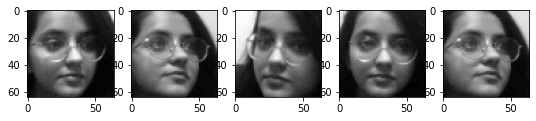

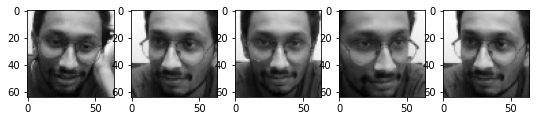

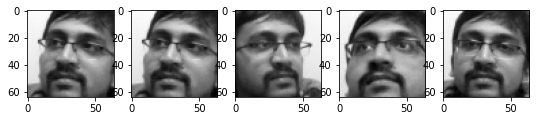

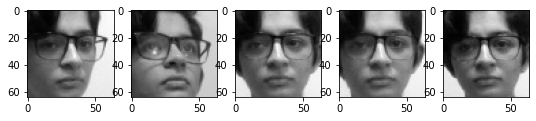

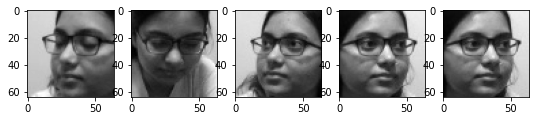

In [10]:
# Plotting the first 5 preproceesed images
# of each participant for data visualization

plt.figure()
f, ax = plt.subplots(1, 5, figsize = (9,9))

for i, ax in enumerate(ax.flat):
    ax.imshow(data[i], cmap = 'gray')

f, ax = plt.subplots(1, 5, figsize = (9,9))

for i, ax in enumerate(ax.flat):
    ax.imshow(data[24 + i], cmap = 'gray')

f, ax = plt.subplots(1, 5, figsize = (9,9))

for i, ax in enumerate(ax.flat):
    ax.imshow(data[50 + i], cmap = 'gray')

f, ax = plt.subplots(1, 5, figsize = (9,9))

for i, ax in enumerate(ax.flat):
    ax.imshow(data[70 + i], cmap = 'gray')

f, ax = plt.subplots(1, 5, figsize = (9,9))

for i, ax in enumerate(ax.flat):
    ax.imshow(data[98 + i], cmap = 'gray')

f, ax = plt.subplots(1, 5, figsize = (9,9))

for i, ax in enumerate(ax.flat):
    ax.imshow(data[130+i], cmap = 'gray')




In [12]:
# Converting the image set to a csv
# file and thus creating a dataframe
# For this, images are flattened into
# a 1D array of pixel values which
# are represented by the rows of the
# csv file

from PIL import Image

new_img=[]
for file in filepaths:
    Im = Image.open(file)
    new_img.append(list(Im.getdata()))
    
import numpy as np
from numpy import savetxt
import pandas as pd
img_arr=np.asarray(new_img)
print(img_arr.shape)
pd.DataFrame(img_arr).to_csv('/home/vaishnavi/PCA.csv')

(139, 4096)


In [13]:
# Reading the csv file
# and printing it

import pandas as pd
df = pd.read_csv('/home/vaishnavi/PCA.csv')
print(df.shape)
df.iloc[:, :-1]

(139, 4097)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094
0,0,224,225,222,218,216,206,183,107,59,...,62,61,59,43,35,30,29,27,24,24
1,1,55,45,42,40,35,34,31,26,23,...,44,52,61,39,37,32,36,36,55,73
2,2,224,224,224,225,225,224,223,222,224,...,78,78,77,73,72,72,71,67,66,68
3,3,33,28,23,22,21,19,18,19,20,...,209,210,212,210,210,210,211,211,212,212
4,4,39,30,25,24,23,23,24,24,22,...,175,177,177,176,178,178,177,176,178,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,18,18,18,18,19,19,19,20,20,...,176,183,181,166,160,156,158,158,157,156
135,135,181,179,182,179,179,182,181,180,181,...,12,10,11,12,32,28,24,17,29,72
136,136,187,187,187,187,187,187,187,187,186,...,39,39,41,42,36,31,24,13,6,7
137,137,211,211,184,73,35,32,30,22,21,...,141,149,168,174,162,180,207,215,212,211


In [16]:
# Splitting the above dataframe into
# training and testing sets

y = pd.DataFrame(y_label, columns = ['labels'])

X = df.iloc[:, 1:]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y)

(139, 4096) (139, 1)


Text(0, 0.5, 'Variance')

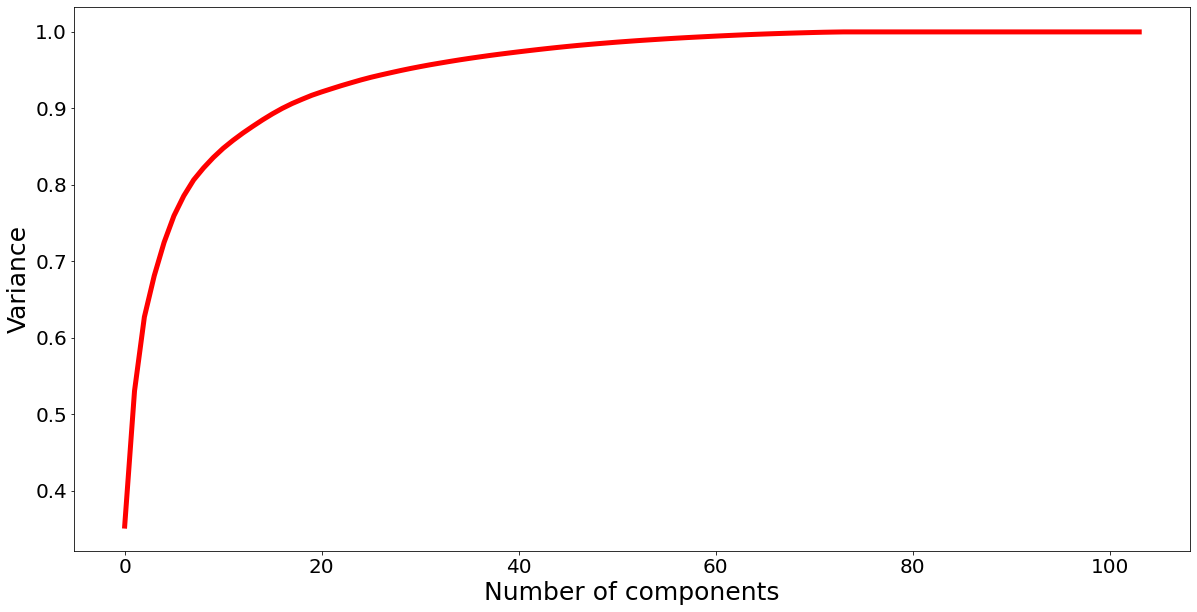

In [30]:
# Applying PCA to find an
# appropriate value for n_components

pca = PCA().fit(X_train)
plt.figure(figsize=(20, 10))
plt.plot(pca.explained_variance_ratio_.cumsum(), c='r', linewidth=5)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Number of components', size=25)
plt.ylabel('Variance', size=25)

In [18]:
# Finding the number of components
# which have a variance > 95%

arr = np.where(pca.explained_variance_ratio_.cumsum() > 0.95)
print('Total number of components with var>95% :', len(arr[0]))
print('\nComponents with var>90% are as follows: \n\n', arr)

Total number of components with var>95% : 75

Components with var>90% are as follows: 

 (array([ 29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),)


In [19]:
len(arr[0])

75

In [20]:
# Applying PCA again, but now using
# the n_components value 

from sklearn.svm import SVC

n_components = 80

pca = PCA(n_components=80).fit(X_train)
X_train_pca = pca.transform(X_train)

classifier = SVC().fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test)

predictions = classifier.predict(X_test_pca)

# Printing the accuracy report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.86      1.00      0.92         6
           3       0.89      0.89      0.89         9
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00         4
           6       1.00      0.75      0.86         4

    accuracy                           0.91        35
   macro avg       0.93      0.92      0.92        35
weighted avg       0.92      0.91      0.91        35



/home/vaishnavi/anaconda3/envs/AIpy364/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


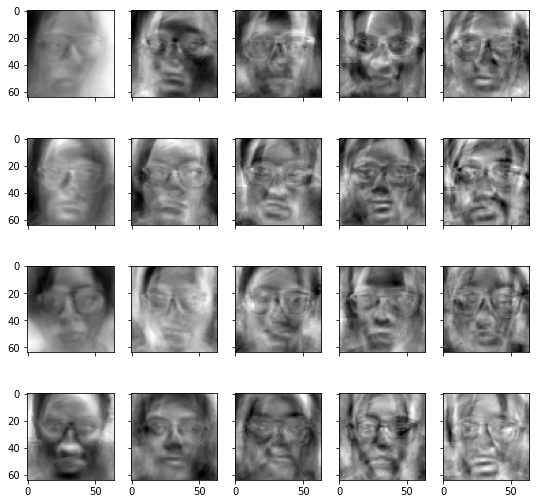

In [21]:
# Printing 20 eigenfaces as examples
# by extracting from the PCA model

eigenfaces = pca.components_[:n_components]

f, ax = plt.subplots(4,5, sharex=True, sharey=True, figsize=(9,9))
for i in range(20):
    ax[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
plt.show()

### Assigning weights using eigenfaces

#### Using eigenfaces, weights are assigned to different features. This weighted feautre vector is then used for predicting faces

In [22]:
# Creating the weight vector using the 
# feauture values from eigenfaces

weights = eigenfaces @ (X_train - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

Shape of the weight matrix: (80, 104)


In [34]:
# Using a new image of one of the 6 participants
# as a testing image for prediction
# Euclidean distance is then calculted and
# used for calculating the label which is 
# the closest to the test image label

from PIL import Image
test = Image.open("/home/vaishnavi/PCA/gauri/gauri2.jpg")
test = np.asarray(test.getdata())

test_weight = eigenfaces @ (query - pca.mean_).T

euclidean_dist = np.linalg.norm(weights[1] - test_weight)

pred_match = np.argmin(euclidean_dist)
print("Best prediction is %s" % labels[best_match]) # prints the numeric label of the predicted match
print("Euclidean distance calculated is %f" % euclidean_dist) 

Best prediction is 0
Euclidean distance calculated is 4759.066820


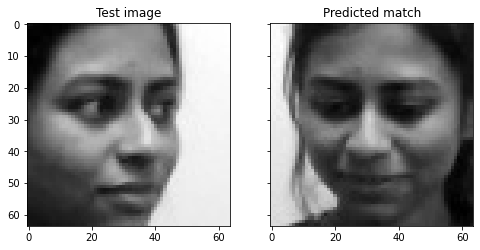

In [35]:
# The test image and best prediction
# are printed together to visualize 
# the results of the analysis

f, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
ax[0].imshow(query.reshape(data[0].shape), cmap="gray")
ax[0].set_title("Test image")

pred_match = X.iloc[pred_match, :]
pred_match = np.array(match, dtype='uint8')
pred_match = match.reshape((64, 64))
pred_match = Image.fromarray(match)

ax[1].imshow(matched_img, cmap="gray")
ax[1].set_title("Predicted match")
plt.show()